In [75]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [3]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
df.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [5]:
df.shape

(1190, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [7]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [8]:
df.columns = ['age','sex','chest_pain_type','resting_blood_pressure','cholestrol','fasting_blood_sugar','resting_ecg','maximum_heart_rate','exercise_angina','old_peak','st_slope','target']

In [9]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestrol',
       'fasting_blood_sugar', 'resting_ecg', 'maximum_heart_rate',
       'exercise_angina', 'old_peak', 'st_slope', 'target'],
      dtype='object')

In [10]:
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non=anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'

In [11]:
df['resting_ecg'][df['resting_ecg'] == 0] = 'normal'
df['resting_ecg'][df['resting_ecg'] == 1] = 'st-t wave abnormality'
df['resting_ecg'][df['resting_ecg'] == 2] = 'left ventricular hypertrophy'

In [12]:
df['st_slope'][df['st_slope'] == 1] = 'unsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

In [13]:
df['sex'] = df.sex.apply(lambda x: 'male' if x==1 else 'female')

In [14]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_angina,old_peak,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,unsloping,0
1,49,female,non=anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,st-t wave abnormality,98,0,0.0,unsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non=anginal pain,150,195,0,normal,122,0,0.0,unsloping,0


In [15]:
df['chest_pain_type'].value_counts()

asymptomatic        625
non=anginal pain    283
atypical angina     216
typical angina       66
Name: chest_pain_type, dtype: int64

In [17]:
df['resting_ecg'].value_counts()

normal                          684
left ventricular hypertrophy    325
st-t wave abnormality           181
Name: resting_ecg, dtype: int64

In [19]:
df['st_slope'].value_counts()

flat           582
unsloping      526
downsloping     81
0                1
Name: st_slope, dtype: int64

In [20]:
df.drop(df[df['st_slope'] == 0].index, inplace = True)

In [21]:
df['st_slope'].value_counts()

flat           582
unsloping      526
downsloping     81
Name: st_slope, dtype: int64

In [22]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_angina,old_peak,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,unsloping,0
1,49,female,non=anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,st-t wave abnormality,98,0,0.0,unsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non=anginal pain,150,195,0,normal,122,0,0.0,unsloping,0


In [23]:
df.isnull()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_angina,old_peak,st_slope,target
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,False,False,False,False,False,False,False,False,False,False,False,False
1186,False,False,False,False,False,False,False,False,False,False,False,False
1187,False,False,False,False,False,False,False,False,False,False,False,False
1188,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
df.isnull().sum()

age                       0
sex                       0
chest_pain_type           0
resting_blood_pressure    0
cholestrol                0
fasting_blood_sugar       0
resting_ecg               0
maximum_heart_rate        0
exercise_angina           0
old_peak                  0
st_slope                  0
target                    0
dtype: int64

In [27]:
df.describe()

,age,resting_blood_pressure,cholestrol,fasting_blood_sugar,maximum_heart_rate,exercise_angina,old_peak,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [28]:
df.describe(include=[np.object])

,sex,chest_pain_type,resting_ecg,st_slope
count,1189,1189,1189,1189
unique,2,4,3,3
top,male,asymptomatic,normal,flat
freq,908,625,683,582


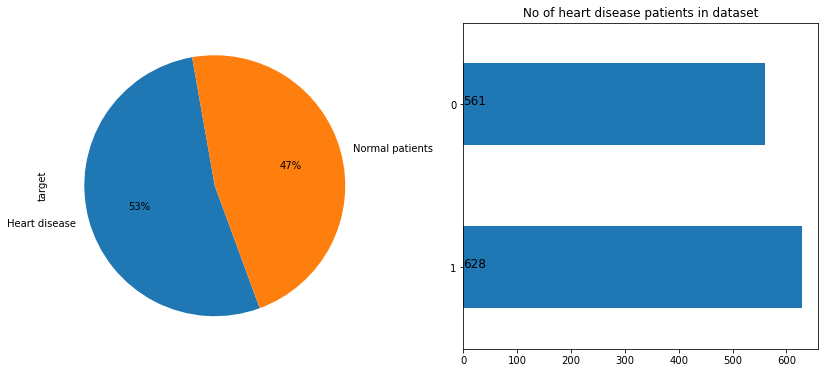

In [41]:
fig, (axis1,axis2) = plt.subplots(nrows = 1, ncols= 2, sharey = False, figsize=(14,6))
axis1 = df['target'].value_counts().plot.pie(x = 'Heart disease', y = 'no of patients', autopct = '%1.0f%%', labels = ['Heart disease','Normal patients'], startangle = 100, ax= axis1)

axis2 = df['target'].value_counts().plot(kind = 'barh', ax = axis2)


for i,j in enumerate (df['target'].value_counts().values):
    axis2.text(.5,i,j,fontsize=12)
axis2.set(title = 'No of heart disease patients in dataset')
plt.show()

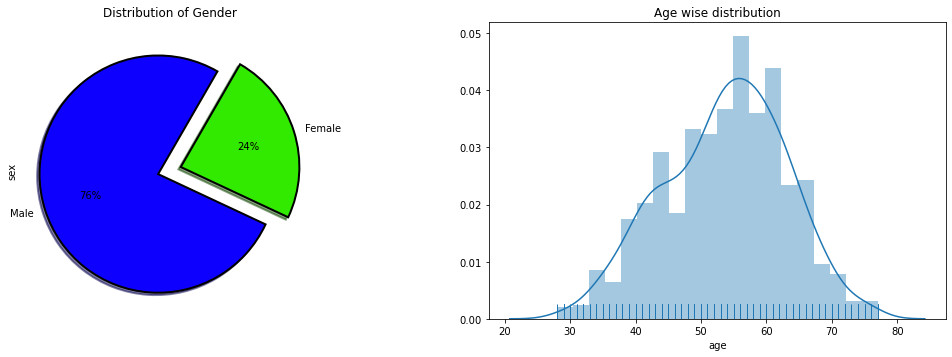

In [50]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df['sex'].value_counts().plot.pie(autopct = '%1.0f%%', colors = sns.color_palette('prism',5), startangle = 60, labels =['Male','Female'], wedgeprops = {'linewidth':2, 'edgecolor':'k'}, explode = [.1,.1], shadow = True)
plt.title('Distribution of Gender')
plt.subplot(222)
ax = sns.distplot(df['age'], rug = True)
plt.title('Age wise distribution')
plt.show()

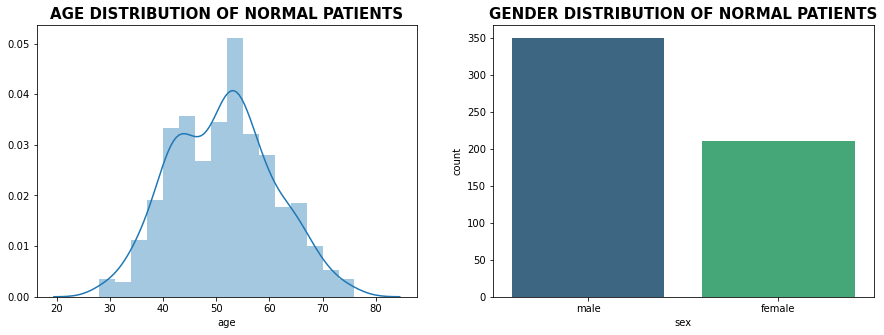

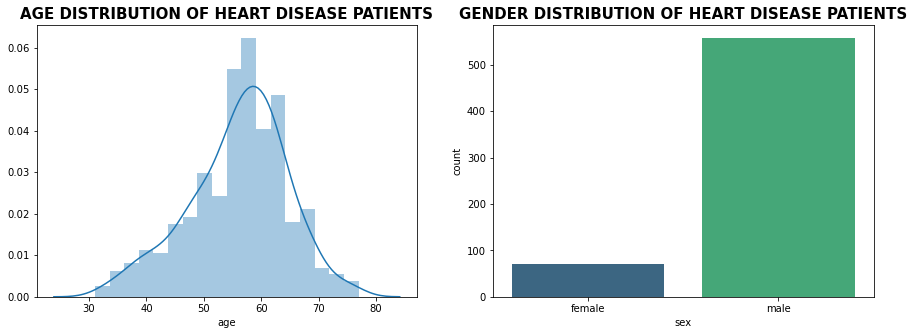

In [53]:
#creating separate dataframes for normal and heart patients
attr_1  = df[df['target'] == 1]
attr_0  = df[df['target'] == 0]

#plotting normal patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

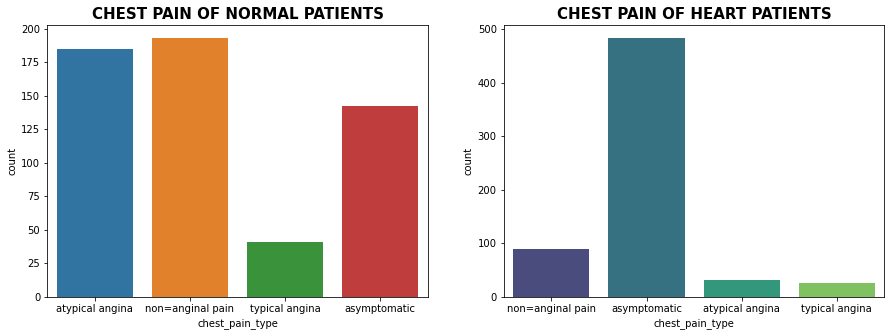

In [54]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['chest_pain_type'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['chest_pain_type'], palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

As we konw that from medicl terminology, atypical angina and non-anginal pain are not risky, whereas asymptomatic pains are risky that causes heart attack. It is clear from the graph that normal patients have higher count of atypical angina and non-anginal pain when compared to heart patients. Heart patients have higher percentage of asymptomatic pains.

In [56]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
asymptomatic,25.310000,76.910000
atypical angina,32.980000,4.940000
non=anginal pain,34.400000,14.170000
typical angina,7.310000,3.980000


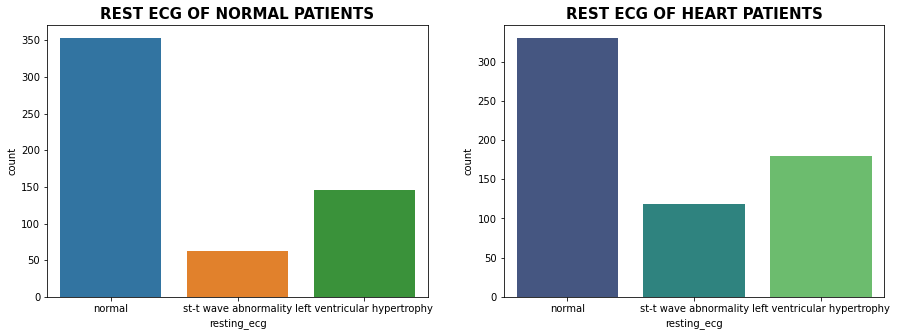

In [58]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['resting_ecg'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['resting_ecg'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [61]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['resting_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
resting_ecg,,
left ventricular hypertrophy,26.020000,28.500000
normal,62.920000,52.550000
st-t wave abnormality,11.050000,18.950000


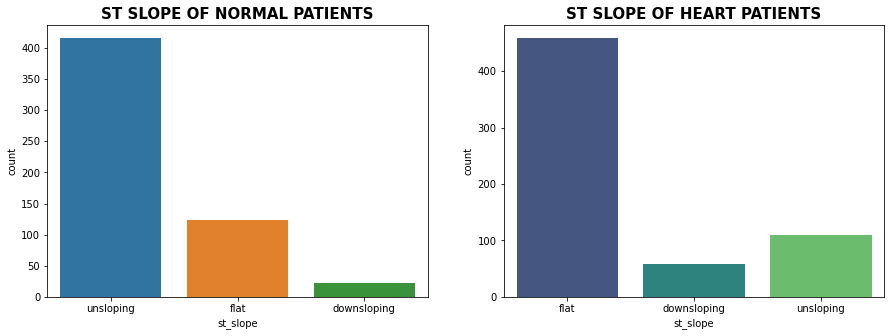

In [62]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['st_slope'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['st_slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

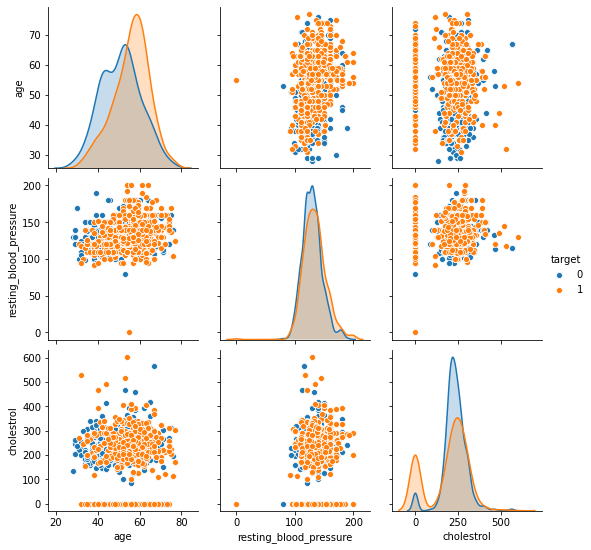

In [65]:
sns.pairplot(df, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholestrol'] )

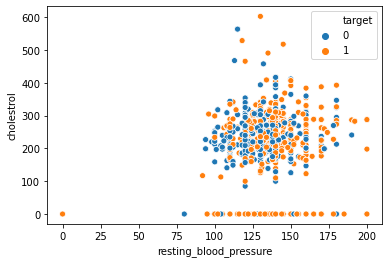

In [66]:

sns.scatterplot(x = 'resting_blood_pressure', y = 'cholestrol', hue = 'target', data = df)

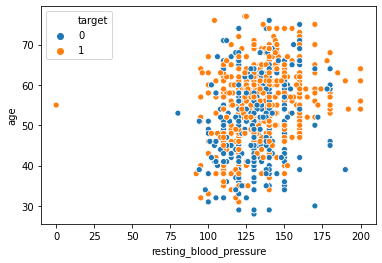

In [67]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = df)

In [69]:
df_numeric = df[['age','resting_blood_pressure','cholestrol','maximum_heart_rate']]

In [70]:
df_numeric.head()

,age,resting_blood_pressure,cholestrol,maximum_heart_rate
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [71]:
df_numeric.shape

(1189, 4)

In [76]:
z = np.abs(stats.zscore(df_numeric))
print(z)

[[1.46626567 0.4281359  0.7752277  1.26430092]
 [0.5035987  1.51737007 0.29951621 0.63725935]
 [1.78715466 0.11648118 0.71606748 1.63576637]
 ...
 [0.35210527 0.11648118 0.78265797 0.96953469]
 [0.35210527 0.11648118 0.2526458  1.34268112]
 [1.68019167 0.31921249 0.34881639 1.30349102]]


In [77]:
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074], dtype=int64), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1], dtype=int64))


In [78]:
df = df[(z < 3).all(axis=1)]

In [79]:
df.shape

(1172, 12)

In [80]:
df = pd.get_dummies(df, drop_first=True)

df.head()

,age,resting_blood_pressure,cholestrol,fasting_blood_sugar,maximum_heart_rate,exercise_angina,old_peak,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non=anginal pain,chest_pain_type_typical angina,resting_ecg_normal,resting_ecg_st-t wave abnormality,st_slope_flat,st_slope_unsloping
0,40,140,289,0,172,0,0.0,0,1,1,0,0,1,0,0,1
1,49,160,180,0,156,0,1.0,1,0,0,1,0,1,0,1,0
2,37,130,283,0,98,0,0.0,0,1,1,0,0,0,1,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,1,0,1,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,1,0,0,1


In [81]:
df.tail()

,age,resting_blood_pressure,cholestrol,fasting_blood_sugar,maximum_heart_rate,exercise_angina,old_peak,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non=anginal pain,chest_pain_type_typical angina,resting_ecg_normal,resting_ecg_st-t wave abnormality,st_slope_flat,st_slope_unsloping
1185,45,110,264,0,132,0,1.2,1,1,0,0,1,1,0,1,0
1186,68,144,193,1,141,0,3.4,1,1,0,0,0,1,0,1,0
1187,57,130,131,0,115,1,1.2,1,1,0,0,0,1,0,1,0
1188,57,130,236,0,174,0,0.0,1,0,1,0,0,0,0,1,0
1189,38,138,175,0,173,0,0.0,0,1,0,1,0,1,0,0,1


In [82]:
df.shape

(1172, 16)

In [83]:
X = df.drop(['target'],axis=1)
y = df['target']

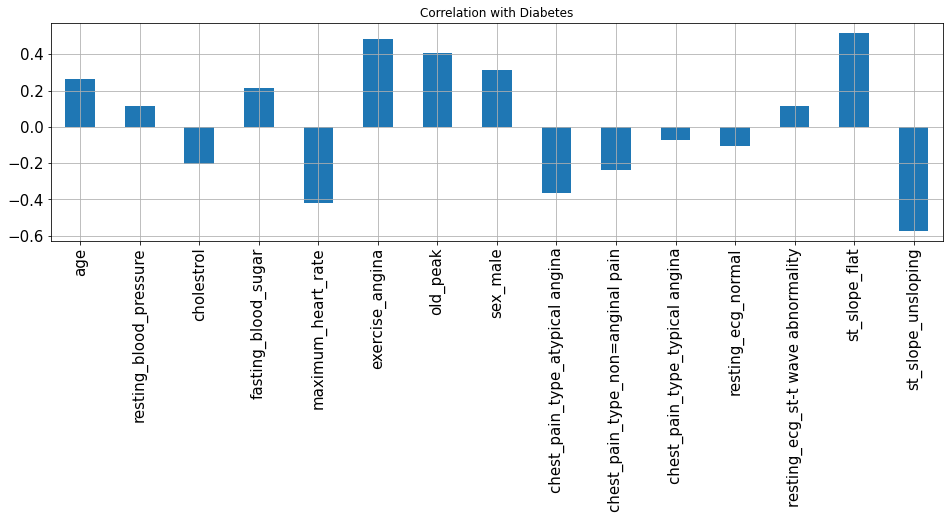

In [84]:
X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [89]:
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())

Distribution of target variable in training set
1    491
0    446
Name: target, dtype: int64
Distribution of target variable in test set
1    123
0    112
Name: target, dtype: int64


In [90]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(937, 15)
(937,)
------------Test Set------------------
(235, 15)
(235,)


In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholestrol','maximum_heart_rate','old_peak']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholestrol','maximum_heart_rate','old_peak']])
X_train.head()

,age,resting_blood_pressure,cholestrol,fasting_blood_sugar,maximum_heart_rate,exercise_angina,old_peak,sex_male,chest_pain_type_atypical angina,chest_pain_type_non=anginal pain,chest_pain_type_typical angina,resting_ecg_normal,resting_ecg_st-t wave abnormality,st_slope_flat,st_slope_unsloping
478,0.673469,0.193548,0.000000,1,0.303704,1,0.454545,1,0,0,0,1,0,0,0
253,0.673469,0.354839,0.594705,0,0.355556,1,0.194805,1,0,0,0,0,1,0,1
273,0.551020,0.516129,0.409369,0,0.466667,1,0.584416,1,0,0,0,1,0,1,0
111,0.591837,0.623656,0.519348,0,0.185185,1,0.584416,1,0,0,0,1,0,1,0
50,0.448980,0.408602,0.474542,0,0.400000,1,0.454545,1,0,0,0,1,0,1,0


In [96]:
X_test[['age','resting_blood_pressure','cholestrol','maximum_heart_rate','old_peak']] = scaler.transform(X_test[['age','resting_blood_pressure','cholestrol','maximum_heart_rate','old_peak']])
X_test.head()

,age,resting_blood_pressure,cholestrol,fasting_blood_sugar,maximum_heart_rate,exercise_angina,old_peak,sex_male,chest_pain_type_atypical angina,chest_pain_type_non=anginal pain,chest_pain_type_typical angina,resting_ecg_normal,resting_ecg_st-t wave abnormality,st_slope_flat,st_slope_unsloping
1024,0.693878,0.301075,0.572301,0,0.266667,0,0.376623,1,1,0,0,0,0,1,0
182,0.469388,0.408602,0.456212,0,0.614815,0,0.194805,1,1,0,0,1,0,0,1
785,0.346939,0.494624,0.480652,0,0.629630,1,0.220779,0,0,0,0,0,0,1,0
924,0.591837,0.623656,0.562118,0,0.333333,1,0.272727,1,0,0,0,0,0,1,0
780,0.612245,0.387097,0.527495,0,0.466667,1,0.584416,1,0,0,0,0,0,1,0


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [115]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb

def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000)))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500)))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100)))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000)))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

In [116]:
def BasedLine2(X_train, y_train,models):
    
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [117]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR_L2: 0.851704 (0.051909)
KNN7: 0.851659 (0.045839)
KNN5: 0.846271 (0.042031)
KNN9: 0.854873 (0.048576)
KNN11: 0.845276 (0.043885)
CART: 0.874056 (0.024673)
NB: 0.844258 (0.044297)
SVM Linear: 0.852803 (0.052849)
SVM RBF: 0.857024 (0.045133)
AB: 0.854919 (0.035449)
GBM: 0.882636 (0.031470)
RF_Ent100: 0.933894 (0.033149)
RF_Gini100: 0.930668 (0.030502)
ET100: 0.923175 (0.029612)
ET500: 0.922123 (0.026450)
MLP: 0.862343 (0.033754)
SGD3000: 0.838881 (0.039854)
[15:23:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

In [119]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.906383,0.879699,0.95122,0.857143,0.914062,0.904181,3.233472,0.814595


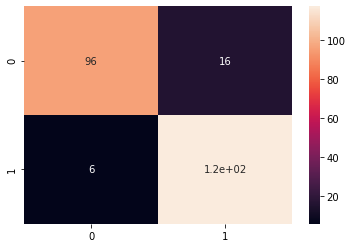

In [120]:
CM=confusion_matrix(y_test,y_pred_rfe)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_rfe)
acc= accuracy_score(y_test, y_pred_rfe)
roc=roc_auc_score(y_test, y_pred_rfe)
prec = precision_score(y_test, y_pred_rfe)
rec = recall_score(y_test, y_pred_rfe)
f1 = f1_score(y_test, y_pred_rfe)

mathew = matthews_corrcoef(y_test, y_pred_rfe)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results